# **Convert `tsv` to `csv`**

## Imports

In [2]:
import pandas as pd
import os

In [3]:
pd.set_option('display.max_colwidth', None)

## Read data

In [4]:
with open('./tsv/train.tsv', 'r', encoding='utf-8') as f:
    train = f.readlines()

## Check if there are any bad lines

In [5]:
print(len(train))

3577


In [6]:
for line in train:
    if len(line.split('\t')) != 5:
        print(line)

## Divide data into columns

In [7]:
label, id_1, id_2, sentence_1, sentence_2 = [], [], [], [], []
for i in range(1, len(train)):
    line = train[i].split('\t')
    label.append(line[0])

    id_1.append(line[1])
    id_2.append(line[2])

    sentence_1.append(line[3])
    sentence_2.append(line[4][:-1])

## Check columns' length

In [8]:
len(label), len(id_1), len(id_2), len(sentence_1), len(sentence_2)

(3576, 3576, 3576, 3576, 3576)

## Dataframe

In [9]:
labels = train[0][:-1].split('\t')
labels

['Quality', '#1 ID', '#2 ID', '#1 String', '#2 String']

In [10]:
train_df = pd.DataFrame({labels[0]: label, 
                         labels[1]: id_1, 
                         labels[2]: id_2, 
                         labels[3]: sentence_1, 
                         labels[4]: sentence_2})
train_df

,Quality,#1 ID,#2 ID,#1 String,#2 String
0,1,702876,702977,"Amrozi accused his brother, whom he called ""the witness"", of deliberately distorting his evidence.","Referring to him as only ""the witness"", Amrozi accused his brother of deliberately distorting his evidence."
1,0,2108705,2108831,Yucaipa owned Dominick's before selling the chain to Safeway in 1998 for $2.5 billion.,Yucaipa bought Dominick's in 1995 for $693 million and sold it to Safeway for $1.8 billion in 1998.
2,1,1330381,1330521,"They had published an advertisement on the Internet on June 10, offering the cargo for sale, he added.","On June 10, the ship's owners had published an advertisement on the Internet, offering the explosives for sale."
3,0,3344667,3344648,"Around 0335 GMT, Tab shares were up 19 cents, or 4.4%, at A$4.56, having earlier set a record high of A$4.57.","Tab shares jumped 20 cents, or 4.6%, to set a record closing high at A$4.57."
4,1,1236820,1236712,"The stock rose $2.11, or about 11 percent, to close Friday at $21.51 on the New York Stock Exchange.",PG&E Corp. shares jumped $1.63 or 8 percent to $21.03 on the New York Stock Exchange on Friday.
...,...,...,...,...,...
3571,1,1466168,1466246,"During the flight, engineers misjudged the extent of the damage, and even during that period they lamented that the liftoff photography was poor.","During the flight, engineers underestimated the extent of the damage, and even then lamented that the liftoff photography was so poor."
3572,0,2245085,2245118,"The Web site is registered to Parson under his home address, allowing investigators to trace him easily.","The t33kid.com site is registered to Parson at an address in Hopkins, Minnesota."
3573,1,3237867,3237902,"The woman, Mary Kathryn Miller, 55, was arrested by the state police on Nov. 20 and charged with first-degree larceny.","Mary Kathryn Miller, 55, of 27 Devon Road, Darien, was arrested Nov. 20 by state police and charged with first-degree larceny."
3574,0,2194711,2194792,"The Hubble Space Telescope's newest picture of Mars shows summer on the Red Planet just as it makes its closest pass by Earth in 60,000 years.","The pictures were taken late Tuesday and early Wednesday as the as the planet made its closest pass by Earth in 60,000 years."


In [11]:
train_df = train_df.rename(
    columns={labels[0]: 'label',
             labels[1]: 'id_1',
             labels[2]: 'id_2',
             labels[3]: 'text_1',
             labels[4]: 'text_2'}
)
train_df.head()

,label,id_1,id_2,text_1,text_2
0,1,702876,702977,"Amrozi accused his brother, whom he called ""the witness"", of deliberately distorting his evidence.","Referring to him as only ""the witness"", Amrozi accused his brother of deliberately distorting his evidence."
1,0,2108705,2108831,Yucaipa owned Dominick's before selling the chain to Safeway in 1998 for $2.5 billion.,Yucaipa bought Dominick's in 1995 for $693 million and sold it to Safeway for $1.8 billion in 1998.
2,1,1330381,1330521,"They had published an advertisement on the Internet on June 10, offering the cargo for sale, he added.","On June 10, the ship's owners had published an advertisement on the Internet, offering the explosives for sale."
3,0,3344667,3344648,"Around 0335 GMT, Tab shares were up 19 cents, or 4.4%, at A$4.56, having earlier set a record high of A$4.57.","Tab shares jumped 20 cents, or 4.6%, to set a record closing high at A$4.57."
4,1,1236820,1236712,"The stock rose $2.11, or about 11 percent, to close Friday at $21.51 on the New York Stock Exchange.",PG&E Corp. shares jumped $1.63 or 8 percent to $21.03 on the New York Stock Exchange on Friday.


## Save dataframe to csv

In [12]:
if not os.path.exists('./csv'):
    os.makedirs('./csv')
train_df.to_csv('./csv/train.csv', index=False)

## Dev set

In [13]:
with open('./tsv/dev.tsv', 'r', encoding='utf-8') as f:
    dev = f.readlines()

print(len(dev))

dev_label, dev_id_1, dev_id_2, dev_sentence_1, dev_sentence_2 = [], [], [], [], []

for i in range(1, len(dev)):
    line = dev[i].split('\t')
    if len(line) != 5:
        print(line)

    dev_label.append(line[0])

    dev_id_1.append(line[1])
    dev_id_2.append(line[2])

    dev_sentence_1.append(line[3])
    dev_sentence_2.append(line[4][:-1])

dev_labels = dev[0][:-1].split('\t')

dev_df = pd.DataFrame({dev_labels[0]: dev_label,
                          dev_labels[1]: dev_id_1,
                          dev_labels[2]: dev_id_2,
                          dev_labels[3]: dev_sentence_1,
                          dev_labels[4]: dev_sentence_2})
dev_df


501


,Quality,#1 ID,#2 ID,#1 String,#2 String
0,1,1479718,1479546,Stocks have rallied sharply for more than three months in anticipation of a rebound in the second half of the year.,Stocks have rallied sharply for more than three months in anticipation of an economic rebound in the year's second half.
1,0,1091286,1091304,"The Fed's Empire State survey far exceeded expectations by jumping to 26.8 in June, a record high, from 10.6 in May.","Prices had pulled back from offshore highs when the Empire State survey far exceeded expectations by jumping to 26.8 in June, a record high, from 10.6 in May."
2,1,2158854,2158971,"Druce will face murder charges, Conte said.",Conte said Druce will be charged with murder.
3,1,2086152,2086347,"""We're a quiet, peaceful town of 862 people and nothing ever happens,"" said Carolyn Greene Bennett, Cedar Grove's town recorder.","""We're a quiet, peaceful town of 862 people and nothing ever happens,"" Bennett said."
4,0,3107641,3107862,"Nursing schools turned away more than 5,000 qualified applicants in the past year because of shortages of faculty and classroom space.","The American Association of Nursing Colleges reported that schools turned away more than 5,000 qualified applicants last year."
...,...,...,...,...,...
495,1,1620264,1620507,"""At this point, Mr. Brando announced: 'Somebody ought to put a bullet'"" through her head, the motion continued.","Brando said that ""somebody ought to put a bullet"" through her head, according to the defense."
496,0,1848001,1848224,"Martin, 58, will be freed today after serving two thirds of his five-year sentence for the manslaughter of 16-year-old Fred Barras.",Martin served two thirds of a five-year sentence for the manslaughter of Barras and for wounding Fearon.
497,1,747160,747144,"""We have concluded that the outlook for price stability over the medium term has improved significantly since our last decision to lower interest rates,"" Duisenberg said.","In a statement, the ECB said the outlook for price stability over the medium term had ""improved significantly"" since its last decision to lower interest rates in March."
498,1,2539933,2539850,The notification was first reported Friday by MSNBC.,MSNBC.com first reported the CIA request on Friday.


In [14]:
dev_df = dev_df.rename(
    columns={dev_labels[0]: 'label',
             dev_labels[1]: 'id_1',
             dev_labels[2]: 'id_2',
             dev_labels[3]: 'text_1',
             dev_labels[4]: 'text_2'}
)
dev_df.head()

,label,id_1,id_2,text_1,text_2
0,1,1479718,1479546,Stocks have rallied sharply for more than three months in anticipation of a rebound in the second half of the year.,Stocks have rallied sharply for more than three months in anticipation of an economic rebound in the year's second half.
1,0,1091286,1091304,"The Fed's Empire State survey far exceeded expectations by jumping to 26.8 in June, a record high, from 10.6 in May.","Prices had pulled back from offshore highs when the Empire State survey far exceeded expectations by jumping to 26.8 in June, a record high, from 10.6 in May."
2,1,2158854,2158971,"Druce will face murder charges, Conte said.",Conte said Druce will be charged with murder.
3,1,2086152,2086347,"""We're a quiet, peaceful town of 862 people and nothing ever happens,"" said Carolyn Greene Bennett, Cedar Grove's town recorder.","""We're a quiet, peaceful town of 862 people and nothing ever happens,"" Bennett said."
4,0,3107641,3107862,"Nursing schools turned away more than 5,000 qualified applicants in the past year because of shortages of faculty and classroom space.","The American Association of Nursing Colleges reported that schools turned away more than 5,000 qualified applicants last year."


In [15]:
dev_df.to_csv('./csv/dev.csv', index=False)

## Test set

In [16]:
with open('./tsv/test.tsv', 'r', encoding='utf-8') as f:
    test = f.readlines()

print(len(test))

test_label, test_id_1, test_id_2, test_sentence_1, test_sentence_2 = [], [], [], [], []

for i in range(1, len(test)):
    line = test[i].split('\t')
    if len(line) != 5:
        print(line)

    test_label.append(line[0])

    test_id_1.append(line[1])
    test_id_2.append(line[2])

    test_sentence_1.append(line[3])
    test_sentence_2.append(line[4][:-1])

test_labels = test[0][:-1].split('\t')

test_df = pd.DataFrame({test_labels[0]: test_label,
                        test_labels[1]: test_id_1,
                        test_labels[2]: test_id_2,
                        test_labels[3]: test_sentence_1,
                        test_labels[4]: test_sentence_2})
test_df

1726


,Quality,#1 ID,#2 ID,#1 String,#2 String
0,1,1089874,1089925,"PCCW's chief operating officer, Mike Butcher, and Alex Arena, the chief financial officer, will report directly to Mr So.",Current Chief Operating Officer Mike Butcher and Group Chief Financial Officer Alex Arena will report to So.
1,1,3019446,3019327,The world's two largest automakers said their U.S. sales declined more than predicted last month as a late summer sales frenzy caused more of an industry backlash than expected.,Domestic sales at both GM and No. 2 Ford Motor Co. declined more than predicted as a late summer sales frenzy prompted a larger-than-expected industry backlash.
2,1,1945605,1945824,"According to the federal Centers for Disease Control and Prevention (news - web sites), there were 19 reported cases of measles in the United States in 2002.",The Centers for Disease Control and Prevention said there were 19 reported cases of measles in the United States in 2002.
3,0,1430402,1430329,A tropical storm rapidly developed in the Gulf of Mexico Sunday and was expected to hit somewhere along the Texas or Louisiana coasts by Monday night.,A tropical storm rapidly developed in the Gulf of Mexico on Sunday and could have hurricane-force winds when it hits land somewhere along the Louisiana coast Monday night.
4,0,3354381,3354396,The company didn't detail the costs of the replacement and repairs.,But company officials expect the costs of the replacement work to run into the millions of dollars.
...,...,...,...,...,...
1720,0,2685984,2686122,"After Hughes refused to rehire Hernandez, he complained to the Equal Employment Opportunity Commission.",Hernandez filed an Equal Employment Opportunity Commission complaint and sued.
1721,0,339215,339172,There are 103 Democrats in the Assembly and 47 Republicans.,Democrats dominate the Assembly while Republicans control the Senate.
1722,0,2996850,2996734,Bethany Hamilton remained in stable condition Saturday after the attack Friday morning.,"Bethany, who remained in stable condition after the attack Friday morning, talked of the attack Saturday."
1723,1,2095781,2095812,"Last week the power station’s US owners, AES Corp, walked away from the plant after banks and bondholders refused to accept its financial restructuring offer.","The news comes after Drax's American owner, AES Corp. AES.N , last week walked away from the plant after banks and bondholders refused to accept its restructuring offer."


In [17]:
test_df = test_df.rename(
    columns={test_labels[0]: 'label',
             test_labels[1]: 'id_1',
             test_labels[2]: 'id_2',
             test_labels[3]: 'text_1',
             test_labels[4]: 'text_2'}
)
test_df.head()

,label,id_1,id_2,text_1,text_2
0,1,1089874,1089925,"PCCW's chief operating officer, Mike Butcher, and Alex Arena, the chief financial officer, will report directly to Mr So.",Current Chief Operating Officer Mike Butcher and Group Chief Financial Officer Alex Arena will report to So.
1,1,3019446,3019327,The world's two largest automakers said their U.S. sales declined more than predicted last month as a late summer sales frenzy caused more of an industry backlash than expected.,Domestic sales at both GM and No. 2 Ford Motor Co. declined more than predicted as a late summer sales frenzy prompted a larger-than-expected industry backlash.
2,1,1945605,1945824,"According to the federal Centers for Disease Control and Prevention (news - web sites), there were 19 reported cases of measles in the United States in 2002.",The Centers for Disease Control and Prevention said there were 19 reported cases of measles in the United States in 2002.
3,0,1430402,1430329,A tropical storm rapidly developed in the Gulf of Mexico Sunday and was expected to hit somewhere along the Texas or Louisiana coasts by Monday night.,A tropical storm rapidly developed in the Gulf of Mexico on Sunday and could have hurricane-force winds when it hits land somewhere along the Louisiana coast Monday night.
4,0,3354381,3354396,The company didn't detail the costs of the replacement and repairs.,But company officials expect the costs of the replacement work to run into the millions of dollars.


In [18]:
# test_df.to_csv('data/test.csv', index=False)

# **Analyze data**

## **Distribution**

In [19]:
TOTAL = len(train_df) + len(dev_df) + len(test_df)
print(TOTAL)

5801


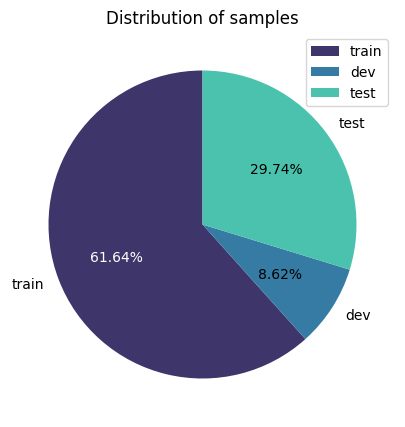

Total:  5801
train:  3576
dev:  500
test:  1725


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
# plot a pie chart of the number of samples in each distribution: train, dev, test
patches, texts, autotexts = plt.pie([len(train_df), len(dev_df), len(test_df)], 
        labels=['train', 'dev', 'test'], 
        autopct='%1.2f%%',
        startangle=90,
        colors=sns.color_palette('mako', 3),
        )
autotexts[0].set_color('white')
plt.legend()
plt.title('Distribution of samples')
plt.show()

print('Total: ', TOTAL)
print('train: ', len(train_df))
print('dev: ', len(dev_df))
print('test: ', len(test_df))

In [21]:
# percentage of paraphrase in each distribution: label = 1
train_paraphrase_df = train_df[train_df['label'] == '1']
dev_paraphrase_df = dev_df[dev_df['label'] == '1']
test_paraphrase_df = test_df[test_df['label'] == '1']

train_paraphrase = len(train_paraphrase_df)
dev_paraphrase = len(dev_paraphrase_df)
test_paraphrase = len(test_paraphrase_df)

print('train paraphrase: ', train_paraphrase, f'({train_paraphrase / len(train_df)})')
print('dev paraphrase: ', dev_paraphrase, f'({dev_paraphrase / len(dev_df)})')
print('test paraphrase: ', test_paraphrase, f'({test_paraphrase / len(test_df)})')

train paraphrase:  2407 (0.6730984340044742)
dev paraphrase:  346 (0.692)
test paraphrase:  1147 (0.664927536231884)


In [22]:
# distribution table: subset | paraphrase | not paraphrase | total
# pretty print
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ['subset', 'paraphrase', 'not paraphrase', 'total']
x.add_row(['train', train_paraphrase, len(train_df) - train_paraphrase, len(train_df)])
x.add_row(['dev', dev_paraphrase, len(dev_df) - dev_paraphrase, len(dev_df)])
x.add_row(['test', test_paraphrase, len(test_df) - test_paraphrase, len(test_df)])
# add total row
x.add_row(['total', train_paraphrase + dev_paraphrase + test_paraphrase, TOTAL - train_paraphrase - dev_paraphrase - test_paraphrase, TOTAL])
print(x)

+--------+------------+----------------+-------+
| subset | paraphrase | not paraphrase | total |
+--------+------------+----------------+-------+
| train  |    2407    |      1169      |  3576 |
|  dev   |    346     |      154       |  500  |
|  test  |    1147    |      578       |  1725 |
| total  |    3900    |      1901      |  5801 |
+--------+------------+----------------+-------+


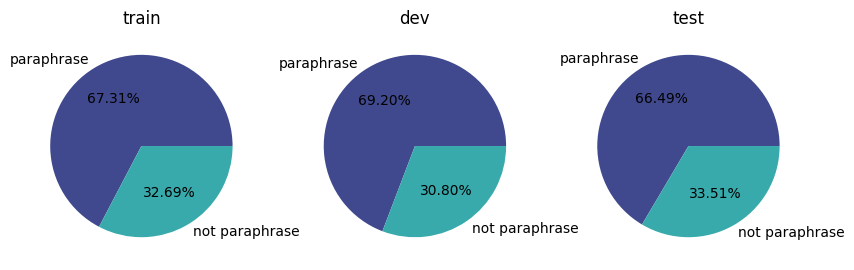

In [34]:
# plot a pie chart of the number of paraphrase in each distribution: train, dev, test
plt.figure(figsize=(10, 5))
# colors
colors = sns.color_palette('mako', 2)
# train
plt.subplot(1, 3, 1)
plt.pie([train_paraphrase, len(train_df) - train_paraphrase], 
        labels=['paraphrase', 'not paraphrase'], 
        autopct='%1.2f%%',
        colors=colors)
plt.title('train')
# dev
plt.subplot(1, 3, 2)
plt.pie([dev_paraphrase, len(dev_df) - dev_paraphrase], 
        labels=['paraphrase', 'not paraphrase'], 
        autopct='%1.2f%%',
        colors=colors)
plt.title('dev')
# test
plt.subplot(1, 3, 3)
plt.pie([test_paraphrase, len(test_df) - test_paraphrase], 
        labels=['paraphrase', 'not paraphrase'], 
        autopct='%1.2f%%',
        colors=colors)
plt.title('test')
# use the same legend for all subplots
plt.show()

## Tokenize

In [24]:
from nltk.tokenize import word_tokenize
from string import punctuation

PUNCT = set(punctuation)
PUNCT.update(["``", '"', "''"])

def tokenize(text: str, remove_punct=False):
    # tokens = list(tokenizer(text))
    # if remove_punct == True:
    #     tokens = [t.text for t in tokens if t.text not in punctuation]

    tokens = word_tokenize(text.lower())
    if remove_punct == True:
        tokens = [t for t in tokens if t not in PUNCT]
    return tokens
tokenize(train_df['text_1'][0], remove_punct=True)

['amrozi',
 'accused',
 'his',
 'brother',
 'whom',
 'he',
 'called',
 'the',
 'witness',
 'of',
 'deliberately',
 'distorting',
 'his',
 'evidence']

In [35]:
train_df['tokens_1'] = train_df['text_1'].apply(tokenize)
train_df['tokens_2'] = train_df['text_2'].apply(tokenize)

train_df['words_1'] = train_df['text_1'].apply(lambda x: tokenize(x, remove_punct=True))
train_df['words_2'] = train_df['text_2'].apply(lambda x: tokenize(x, remove_punct=True))

train_df.head()

,label,id_1,id_2,text_1,text_2,tokens_1,tokens_2,words_1,words_2,tokens_overlap,words_overlap
0,1,702876,702977,"Amrozi accused his brother, whom he called ""the witness"", of deliberately distorting his evidence.","Referring to him as only ""the witness"", Amrozi accused his brother of deliberately distorting his evidence.","[amrozi, accused, his, brother, ,, whom, he, called, ``, the, witness, '', ,, of, deliberately, distorting, his, evidence, .]","[referring, to, him, as, only, ``, the, witness, '', ,, amrozi, accused, his, brother, of, deliberately, distorting, his, evidence, .]","[amrozi, accused, his, brother, whom, he, called, the, witness, of, deliberately, distorting, his, evidence]","[referring, to, him, as, only, the, witness, amrozi, accused, his, brother, of, deliberately, distorting, his, evidence]",0.636364,0.555556
1,0,2108705,2108831,Yucaipa owned Dominick's before selling the chain to Safeway in 1998 for $2.5 billion.,Yucaipa bought Dominick's in 1995 for $693 million and sold it to Safeway for $1.8 billion in 1998.,"[yucaipa, owned, dominick, 's, before, selling, the, chain, to, safeway, in, 1998, for, $, 2.5, billion, .]","[yucaipa, bought, dominick, 's, in, 1995, for, $, 693, million, and, sold, it, to, safeway, for, $, 1.8, billion, in, 1998, .]","[yucaipa, owned, dominick, 's, before, selling, the, chain, to, safeway, in, 1998, for, 2.5, billion]","[yucaipa, bought, dominick, 's, in, 1995, for, 693, million, and, sold, it, to, safeway, for, 1.8, billion, in, 1998]",0.440000,0.391304
2,1,1330381,1330521,"They had published an advertisement on the Internet on June 10, offering the cargo for sale, he added.","On June 10, the ship's owners had published an advertisement on the Internet, offering the explosives for sale.","[they, had, published, an, advertisement, on, the, internet, on, june, 10, ,, offering, the, cargo, for, sale, ,, he, added, .]","[on, june, 10, ,, the, ship, 's, owners, had, published, an, advertisement, on, the, internet, ,, offering, the, explosives, for, sale, .]","[they, had, published, an, advertisement, on, the, internet, on, june, 10, offering, the, cargo, for, sale, he, added]","[on, june, 10, the, ship, 's, owners, had, published, an, advertisement, on, the, internet, offering, the, explosives, for, sale]",0.636364,0.600000
3,0,3344667,3344648,"Around 0335 GMT, Tab shares were up 19 cents, or 4.4%, at A$4.56, having earlier set a record high of A$4.57.","Tab shares jumped 20 cents, or 4.6%, to set a record closing high at A$4.57.","[around, 0335, gmt, ,, tab, shares, were, up, 19, cents, ,, or, 4.4, %, ,, at, a, $, 4.56, ,, having, earlier, set, a, record, high, of, a, $, 4.57, .]","[tab, shares, jumped, 20, cents, ,, or, 4.6, %, ,, to, set, a, record, closing, high, at, a, $, 4.57, .]","[around, 0335, gmt, tab, shares, were, up, 19, cents, or, 4.4, at, a, 4.56, having, earlier, set, a, record, high, of, a, 4.57]","[tab, shares, jumped, 20, cents, or, 4.6, to, set, a, record, closing, high, at, a, 4.57]",0.466667,0.384615
4,1,1236820,1236712,"The stock rose $2.11, or about 11 percent, to close Friday at $21.51 on the New York Stock Exchange.",PG&E Corp. shares jumped $1.63 or 8 percent to $21.03 on the New York Stock Exchange on Friday.,"[the, stock, rose, $, 2.11, ,, or, about, 11, percent, ,, to, close, friday, at, $, 21.51, on, the, new, york, stock, exchange, .]","[pg, &, e, corp., shares, jumped, $, 1.63, or, 8, percent, to, $, 21.03, on, the, new, york, stock, exchange, on, friday, .]","[the, stock, rose, 2.11, or, about, 11, percent, to, close, friday, at, 21.51, on, the, new, york, stock, exchange]","[pg, e, corp., shares, jumped, 1.63, or, 8, percent, to, 21.03, on, the, new, york, stock, exchange, on, friday]",0.413793,0.400000


### Overlapping

In [26]:
def overlap_percentage(sent1: list, sent2: list):
    return len(set(sent1).intersection(set(sent2))) / len(set(sent1).union(set(sent2)))

overlap_percentage(['a', 'b', 'c', 'e'], ['a', 'b', 'c', 'd'])

0.6

In [27]:
train_df['tokens_overlap'] = train_df.apply(lambda x: overlap_percentage(x['tokens_1'], x['tokens_2']), axis=1)
train_df['words_overlap'] = train_df.apply(lambda x: overlap_percentage(x['words_1'], x['words_2']), axis=1)

In [28]:
train_df[['label', 'text_1', 'text_2', 'words_overlap']].sort_values(by='words_overlap', ascending=False)

,label,text_1,text_2,words_overlap
2114,1,South Africa has the world's highest caseload with 4.7 million people infected with HIV or AIDS.,"With 4.7 million people infected with HIV or AIDS, South Africa has the world's highest AIDS caseload.",1.000000
1221,1,"""Dan brings to Coca-Cola enormous experience in managing some of the world's largest and most familiar brands,"" Heyer said in a statement.","In a statement, Heyer said, ""Dan brings to Coca-Cola enormous experience in managing some of the world's largest and most familiar brands.",1.000000
2986,1,"""The gloves are off,"" said UNIFI official Rob O'Neill.","Unifi official Rob O'Neill said: ""The gloves are off.",1.000000
2382,1,"Dotson admitted to FBI agents that he shot Dennehy in the head ""because Patrick had tried to shoot him,"" according to an arrest warrant released Tuesday.","According to an arrest warrant released Tuesday, Dotson admitted to FBI agents that he shot Dennehy in the head ""because Patrick had tried to shoot him.""",1.000000
1080,1,"In an unusual move, the U.S. Patent and Trademark Office is reconsidering a patent affecting Internet pages that critics contend could disrupt millions of Web sites.","In an unusual move that critics contend could disrupt millions of Web sites, the U.S. Patent and Trademark Office is reconsidering a patent affecting Internet pages.",1.000000
...,...,...,...,...
2596,0,"Ryland Group (nyse: RYL - news - people), a homebuilder and mortgage-finance company, sank $9.65, or 11.6 percent, to $73.40.","Swedish telecom equipment maker Ericsson (nasdaq: QCOM - news - people) jumped $2.88, or 15.7 percent, to $21.28.",0.172414
605,0,"In that same time, the S&P and the Nasdaq have gained about 3.5 percent.","The Nasdaq composite gained 4.78 to 1,955.80, having edged up 0.1 percent last week.",0.166667
1371,0,"The 3 rd Armored Cavalry Regiment is 5,200 strong and the largest combat unit at Fort Carson.","Broomhead, 34, was assigned to the 2nd Squadron, 3rd Armored Cavalry Regiment.",0.166667
912,0,"There are now 37 active probable cases in the GTA, compared with 70 cases on June 6.","And, globally, the number of active probable cases has declined to 573.",0.166667


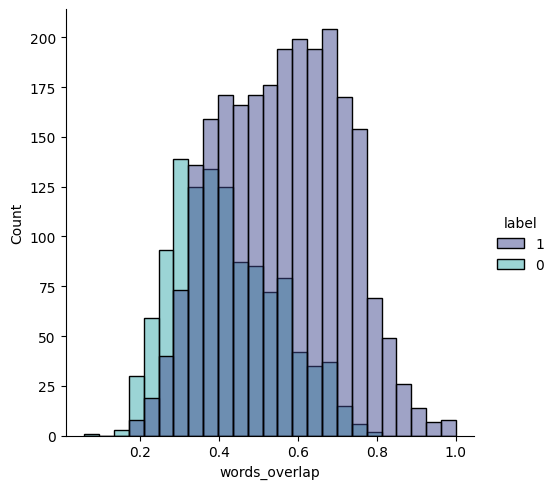

In [29]:
# plot the distribution of overlap percentage grouped by label
import seaborn as sns
sns.displot(data=train_df, x='words_overlap', hue='label', fill=True, bins=25,
            palette=sns.color_palette("mako", 2))
plt.show()

In [30]:
train_df['words_overlap'].groupby(train_df['label']).describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,1169.0,0.415199,0.130788,0.058824,0.318182,0.400000,0.50,0.789474
1,2407.0,0.558766,0.155705,0.178571,0.434783,0.565217,0.68,1.000000


In [36]:
train_df[(train_df['label'] == '0') & (train_df['words_overlap'] >= 0.6)].sort_values(by='words_overlap', ascending=False).head()

,label,id_1,id_2,text_1,text_2,tokens_1,tokens_2,words_1,words_2,tokens_overlap,words_overlap
139,0,143800,143664,"The ECB has cut interest rates six times over that period, from 4.75 percent in October 2000 to 2.5 percent.",The ECB has cut rates from 4.75 percent in October 2000 to 2.5 percent in that period.,"[the, ecb, has, cut, interest, rates, six, times, over, that, period, ,, from, 4.75, percent, in, october, 2000, to, 2.5, percent, .]","[the, ecb, has, cut, rates, from, 4.75, percent, in, october, 2000, to, 2.5, percent, in, that, period, .]","[the, ecb, has, cut, interest, rates, six, times, over, that, period, from, 4.75, percent, in, october, 2000, to, 2.5, percent]","[the, ecb, has, cut, rates, from, 4.75, percent, in, october, 2000, to, 2.5, percent, in, that, period]",0.761905,0.789474
1262,0,197853,197784,The dollar's slide against the yen was curbed by wariness that Japanese authorities could intervene to stem the yen's rise.,"Despite hefty losses against the euro, the dollar's slide versus the yen was curbed by wariness that Japanese authorities could intervene to stem the yen's rise.","[the, dollar, 's, slide, against, the, yen, was, curbed, by, wariness, that, japanese, authorities, could, intervene, to, stem, the, yen, 's, rise, .]","[despite, hefty, losses, against, the, euro, ,, the, dollar, 's, slide, versus, the, yen, was, curbed, by, wariness, that, japanese, authorities, could, intervene, to, stem, the, yen, 's, rise, .]","[the, dollar, 's, slide, against, the, yen, was, curbed, by, wariness, that, japanese, authorities, could, intervene, to, stem, the, yen, 's, rise]","[despite, hefty, losses, against, the, euro, the, dollar, 's, slide, versus, the, yen, was, curbed, by, wariness, that, japanese, authorities, could, intervene, to, stem, the, yen, 's, rise]",0.760000,0.782609
1043,0,2832331,2832384,"Though that slower spending made 2003 look better, many of the expenditures actually will occur in 2004.","Though that slower spending made 2003 look better, many of the expenditures will actually occur in 2004, making that year's shortfall worse.","[though, that, slower, spending, made, 2003, look, better, ,, many, of, the, expenditures, actually, will, occur, in, 2004, .]","[though, that, slower, spending, made, 2003, look, better, ,, many, of, the, expenditures, will, actually, occur, in, 2004, ,, making, that, year, 's, shortfall, worse, .]","[though, that, slower, spending, made, 2003, look, better, many, of, the, expenditures, actually, will, occur, in, 2004]","[though, that, slower, spending, made, 2003, look, better, many, of, the, expenditures, will, actually, occur, in, 2004, making, that, year, 's, shortfall, worse]",0.791667,0.772727
2793,0,726399,726078,"Rosenthal is hereby sentenced to custody of the Federal Bureau of prisons for one day with credit for time served,"" Breyer said to tumultuous cheers in the courtroom.","""Rosenthal is hereby sentenced to custody of the Federal Bureau of Prisons for one day with credit for time served.""","[rosenthal, is, hereby, sentenced, to, custody, of, the, federal, bureau, of, prisons, for, one, day, with, credit, for, time, served, ,, '', breyer, said, to, tumultuous, cheers, in, the, courtroom, .]","[``, rosenthal, is, hereby, sentenced, to, custody, of, the, federal, bureau, of, prisons, for, one, day, with, credit, for, time, served, ., '']","[rosenthal, is, hereby, sentenced, to, custody, of, the, federal, bureau, of, prisons, for, one, day, with, credit, for, time, served, breyer, said, to, tumultuous, cheers, in, the, courtroom]","[rosenthal, is, hereby, sentenced, to, custody, of, the, federal, bureau, of, prisons, for, one, day, with, credit, for, time, served]",0.714286,0.750000
1307,0,514810,514453,The two Democrats on the five-member FCC held a press conference to sway opinion against Powell and the two other Republicans on the panel.,The two Democrats on the five-member FCC panel held a news conference to sway opinion against Powell.,"[the, 

In [32]:
train_df[(train_df['label'] == '0') & (train_df['words_overlap'] >= 0.5)].count()

label             341
id_1              341
id_2              341
text_1            341
text_2            341
tokens_1          341
tokens_2          341
words_1           341
words_2           341
tokens_overlap    341
words_overlap     341
dtype: int64